In [26]:
import pandas as pd

df= pd.read_csv("level_coding_siswa_150.csv")
df

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced
...,...,...,...,...,...,...
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate


In [27]:
df.shape

(174, 6)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours_coding_daily  174 non-null    float64
 1   preferred_language  174 non-null    object 
 2   typing_speed        174 non-null    int64  
 3   import_usage        174 non-null    object 
 4   oop_usage           174 non-null    object 
 5   level               174 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


In [29]:
df.columns

Index(['hours_coding_daily', 'preferred_language', 'typing_speed',
       'import_usage', 'oop_usage', 'level'],
      dtype='object')

In [30]:
df.describe()

,hours_coding_daily,typing_speed
count,174.000000,174.000000
mean,3.215517,38.810345
std,1.299551,14.306864
min,1.000000,20.000000
25%,2.000000,25.250000
50%,3.000000,38.000000
75%,4.000000,50.000000
max,5.500000,65.000000


In [31]:
df.head()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced


In [32]:
df.tail()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate
173,3.0,C++,38,Yes,No,Intermediate


In [33]:
df.dtypes

hours_coding_daily    float64
preferred_language     object
typing_speed            int64
import_usage           object
oop_usage              object
level                  object
dtype: object

In [34]:
df.sample(5, random_state=42)

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
155,4.5,Python,59,Yes,Yes,Intermediate
144,5.0,Python,58,Yes,Yes,Intermediate
101,1.5,C++,20,No,No,Beginner
127,3.0,C++,33,Yes,No,Intermediate
140,3.5,Java,32,Yes,No,Intermediate


In [35]:
df["level"].value_counts()

level
Advanced        64
Beginner        59
Intermediate    51
Name: count, dtype: int64

In [36]:
df["preferred_language"].value_counts()

preferred_language
Python    60
C++       59
Java      55
Name: count, dtype: int64

In [37]:
df["import_usage"].value_counts()

import_usage
Yes    92
No     82
Name: count, dtype: int64

In [38]:
df["oop_usage"].value_counts()

oop_usage
No     93
Yes    81
Name: count, dtype: int64

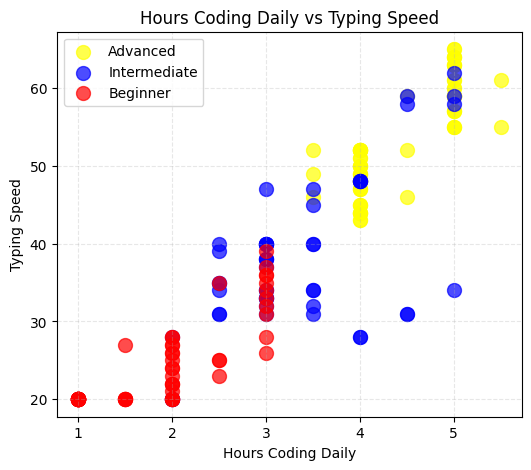

In [50]:
import matplotlib.pyplot as plt

Advanced = df[df["level"]=="Advanced"]
Intermediate = df[df["level"]=="Intermediate"]
Beginner = df[df["level"]=="Beginner"]

plt.figure(figsize=(6,5))

plt.scatter(Level_Advanced["hours_coding_daily"], Level_Advanced["typing_speed"],s=100, alpha=0.7, color="yellow", label="Advanced")
plt.scatter(Level_Intermediate["hours_coding_daily"], Level_Intermediate["typing_speed"],s=100, alpha=0.7, color="blue", label="Intermediate")
plt.scatter(Level_Beginner["hours_coding_daily"], Level_Beginner["typing_speed"], s=100, alpha=0.7, color="red", label="Beginner")

plt.xlabel("Hours Coding Daily")
plt.ylabel("Typing Speed")
plt.title("Hours Coding Daily vs Typing Speed")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[['hours_coding_daily','preferred_language','typing_speed','import_usage','oop_usage']]
y = df['level']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_column = ['hours_coding_daily', 'typing_speed']
categorical_column = ['preferred_language', 'import_usage', 'oop_usage']

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_column),
        ("OHE", OneHotEncoder(), categorical_column)
    ]
)

model_forest = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model_forest", RandomForestClassifier())
    ]
)

model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)

print("accuracy: ", accuracy_score(y_test, y_pred))
print("classification report:\n", classification_report(y_test, y_pred))
print("confusion matrix:\n", confusion_matrix(y_test, y_pred))


accuracy:  0.8571428571428571
classification report:
               precision    recall  f1-score   support

    Advanced       0.94      0.88      0.91        17
    Beginner       0.88      0.88      0.88         8
Intermediate       0.73      0.80      0.76        10

    accuracy                           0.86        35
   macro avg       0.85      0.85      0.85        35
weighted avg       0.86      0.86      0.86        35

confusion matrix:
 [[15  0  2]
 [ 0  7  1]
 [ 1  1  8]]


In [62]:
data_baru = pd.DataFrame([{ "hours_coding_daily": 4,"preferred_language": "Python","typing_speed": 50,"import_usage": "Yes", "oop_usage": "Yes"}])

prediksi = model_random.predict(data_baru)[0]
proba = model_random.predict_proba(data_baru)[0]
presentase = proba.max()  

print(f"Model memprediksi: {prediksi} dengan keyakinan {presentase*100:.2f}%")

NameError: name 'model_random' is not defined

In [61]:
import joblib

joblib.dump( "klasifikasi level coding siswa.joblib")
print("Model berhasil disimpan!")


TypeError: dump() missing 1 required positional argument: 'filename'